In [1]:
#%pip install keras

In [1]:
#%pip install --upgrade tensorflow

In [5]:
import tensorflow as tf
import os

In [13]:
# Directory with our training rzepak pictures
train_rzepak_dir = os.path.join('./temp_datset/train/rzepak')

# Directory with our training nie-rzepak pictures
train_nierzepak_dir = os.path.join('./temp_datset/train/nierzepak')

# Directory with our validation rzepak pictures
valid_rzepak_dir = os.path.join('./temp_dataset/valid/rzepak')

# Directory with our validation nie-rzepak pictures
valid_nierzepak_dir = os.path.join('./temp_dataset/valid/nierzepak')

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './temp_dataset/train/',  # This is the source directory for training images
        classes = ['rzepak', 'nierzepak'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './temp_dataset/valid/',  # This is the source directory for training images
        classes = ['rzepak', 'nierzepak'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 7 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [18]:
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
tf.keras.layers.Dense(1, activation='sigmoid')])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        3

In [23]:
model.compile(loss='binary_crossentropy',
optimizer=tf.optimizers.Adam(),
metrics='accuracy')

In [25]:
history = model.fit(train_generator,
      steps_per_epoch=8, #!!!!!!!!!!! te parametry należy dopracować itp.  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/7
1/1 [==============================] - 0s 158ms/step - loss: 0.4880 - accuracy: 0.8571 - val_loss: 1.0617 - val_accuracy: 0.5000
Epoch 2/7
1/1 [==============================] - 0s 19ms/step - loss: 0.3254 - accuracy: 0.8571
Epoch 3/7
1/1 [==============================] - 0s 19ms/step - loss: 0.3747 - accuracy: 0.8571
Epoch 4/7
1/1 [==============================] - 0s 25ms/step - loss: 0.3300 - accuracy: 0.8571
Epoch 5/7
1/1 [==============================] - 0s 22ms/step - loss: 0.2536 - accuracy: 0.8571
Epoch 6/7
1/1 [==============================] - 0s 52ms/step - loss: 0.2426 - accuracy: 0.8571
Epoch 7/7
1/1 [==============================] - 0s 21ms/step - loss: 0.2309 - accuracy: 0.8571


In [27]:
model.evaluate(validation_generator)

1/1 [==============================] - 0s 860us/step - loss: 0.9629 - accuracy: 0.5000


[0.9628913402557373, 0.5]

In [30]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

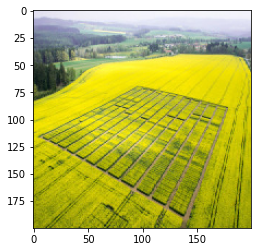

In [38]:
# predicting images
path = 'temp_dataset/train/rzepak/rzepak1.jpg'
img = image.load_img(path, target_size=(200, 200))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)

In [39]:
classes

array([[0.]], dtype=float32)